# Assignment 3.1 - Linear Regression

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

In [1]:
# Daniel Thompson, Paola Gega

---

## Grading Info/Details - Assignment 3.1:

The assignment will be graded semi-automatically, which means that your code will be tested against a set of predefined test cases and qualitatively assessed by a human. This will speed up the grading process for us.

* For passing the test scripts: 
    - Please make sure to **NOT** alter predefined class or function names, as this would lead to failing of the test scripts.
    - Please do **NOT** rename the files before uploading to the Whiteboard!

* **(RESULT)** tags indicate checkpoints that will be specifically assessed by a human.

* You will pass the assignment if you pass the majority of test cases and we can at least confirm effort regarding the **(RESULT)**-tagged checkpoints per task.

---

## Task 3.1.1 - Linear Regression

Linear regression is a supervised learning algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

### 1. Linear Regression Implementation
* Implement a linear regression model optimized by gradient descent or the closed-form approach presented in the lecture using `numpy` only. Use the `LinearRegression` class structure below. Especially, when using the closed-form, beware of numeric stability issues.**(RESULT)**
* Evaluate the performance of your implementation using appropriate metrics for the [AUTO MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset. Make sure to preprocess the data properly for the regression task. Report on the loss during training the regressor. **(RESULT)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, silent=False):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.silent = silent
        self.loss_history = []
        
    def fit(self, X, y):
        '''Train the linear regression model (i.e., calculate the vector of weights)
        using gradient descent.

        We want to minimize the mean squared error loss function:
        L(w) = (1/n) * ||y - Z w||^2

        where Z is the design matrix (with a column of ones for the intercept term).

        If X has correlated features there is not a unique solution for w.
        However our understanding is that gradient descent
        will still converge to a point within the subspace of solutions.

        Parameters:
        X : numpy array of shape (n_samples, n_features)
            The input data.
        y : numpy array of shape (n_samples,)
            The target values.
        '''
        n_samples, n_features = X.shape
        # Add a column of ones to X for the intercept term
        Z = np.column_stack((np.ones((n_samples, 1)), X))
        
        # Initialize weights
        self.weights = np.zeros(n_features + 1)
        # Gradient descent
        for _ in range(self.n_iterations):
            y_pred = Z @ self.weights
            errors = y_pred - y
            gradient = Z.T @ errors / n_samples
            self.weights -= self.learning_rate * gradient
            # Compute and store loss
            loss = np.sum(errors**2) / (2 * n_samples)
            self.loss_history.append(loss)
            # Decrease learning rate over time
            # self.learning_rate *= 0.99
        #     # Check for convergence?
        #     if loss < 1e-6:
        #         if not self.silent:
        #             print(f"Converged after {_} iterations.")
        #         break
        # # If we exit the loop without converging
        # else:
        #     if not self.silent:
        #         print("Warning: Gradient descent did not converge within the" \
        #         " specified number of iterations.")

    def predict(self, X):
        '''Make predictions using the trained linear regression model.

        Parameters:
        X : numpy array of shape (n_samples, n_features)
            The input data.

        Returns:
        y_pred : numpy array of shape (n_samples,)
            The predicted values.
        '''

        # First check if X has the correct number of features
        n_features = X.shape[1]
        if self.weights is None or len(self.weights) != n_features + 1:
            raise ValueError("Input data has incorrect number of features.")
        
        n_samples = X.shape[0]
        # Add a column of ones to X for the intercept term
        Z = np.column_stack((np.ones((n_samples, 1)), X))
        y_pred = Z @ self.weights
        return y_pred


In [4]:
# Get AUTO MPG dataset

# Potentially useful imports
import requests
import zipfile
import pandas as pd
import io

url = "https://archive.ics.uci.edu/static/public/9/auto+mpg.zip"

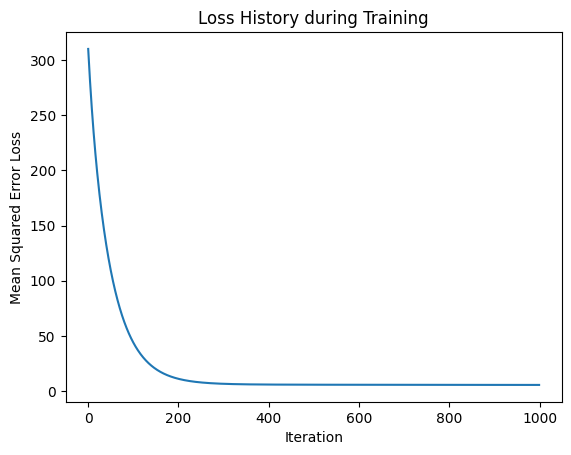

Mean Squared Error on Test Set: 11.6266
Coefficient of Determination R^2 on Test Set: 0.7722


In [ ]:
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(z.open("auto-mpg.data"), sep='\s+', header=None,
                 names=["mpg","cylinders","displacement","horsepower","weight",
                        "acceleration","model year","origin","car name"], na_values='?')
# Preprocess data: handle missing values
df = df.replace('?', np.nan)
df = df.dropna().reset_index(drop=True)
X = df[["cylinders","displacement","horsepower","weight",
        "acceleration","model year","origin"]].to_numpy().astype(float)
y = df["mpg"].to_numpy().astype(float)

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (zero mean, unit variance)
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)
stds[stds == 0] = 1 # Avoid division by zero
X_train = (X_train-means)/stds
X_test = (X_test-means)/stds

# Train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000, silent=True)
model.fit(X_train, y_train)

# Plot loss history during training
plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error Loss")
plt.title("Loss History during Training")
plt.show()

# Evaluate the model by calculating mean squared error of the test set
y_pred = model.predict(X_test)
errors = y_test - y_pred
ss_residual = np.sum(errors**2)
mse = ss_residual / len(y_test)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
# Calculate the coefficient of determination R^2
ss_total = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_residual / ss_total)
print(f"Coefficient of Determination R^2 on Test Set: {r2:.4f}")

Rather than imputing values for missing data, we just delete these samples because there are not very many of them.

## Task 3.1.2 - Polynomial Regression

Transform features into polynomial terms (x, x², x³) to fit non-linear relationships.

* Implement a feature transformation step before feeding to your linear model. **(RESULT)**
* Compare the performance of the polynomial regression model (degree 2 and 3) with the linear model on the [AUTO MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset. **(RESULT)**


In [6]:
from itertools import combinations_with_replacement

class PolynomialFeatures:
    """
    Transform features into polynomial features.
    
    For degree=2 and features [x1, x2]:
    Output: [1, x1, x2, x1², x1*x2, x2²]
    """
    def __init__(self, degree=2):
        self.degree = degree
        
    def fit(self, X):
        """Fit method (no action needed for polynomial features)."""
        pass
    
    def transform(self, X):
        """Transform input data X into polynomial features."""
        n_samples, n_features = X.shape
        # Generate all combinations of feature indices with replacement
        feature_indices = []
        for degree in range(self.degree + 1):
            feature_indices.extend(combinations_with_replacement(range(n_features), degree))
        
        # Create the design matrix
        Z = np.ones((n_samples, len(feature_indices)))
        for i, indices in enumerate(feature_indices):
            for index in indices:
                Z[:, i] *= X[:, index]
        return Z
    
    def fit_transform(self, X):
        """Fit and transform in one step."""
        self.fit(X)
        return self.transform(X)


class PolynomialRegression:
    """Polynomial Regression using Linear Regression with polynomial feature transformation."""
    def __init__(self, degree=2, learning_rate=0.01, n_iterations=1000, silent=False):
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)
        self.linear_model = LinearRegression(
            learning_rate=learning_rate, 
            n_iterations=n_iterations,
            silent=silent
        )
        
    def fit(self, X, y):
        """Fit polynomial regression model."""
        X_poly = self.poly_features.fit_transform(X)
        self.linear_model.fit(X_poly, y)
        if not self.linear_model.silent:
            # Plot loss history during training
            plt.plot(self.linear_model.loss_history)
            plt.xlabel("Iteration")
            plt.ylabel("Mean Squared Error Loss")
            plt.title("Loss History during Training")
            plt.show()
    
    def predict(self, X):
        """Make predictions on new data."""
        X_poly = self.poly_features.transform(X)
        return self.linear_model.predict(X_poly)

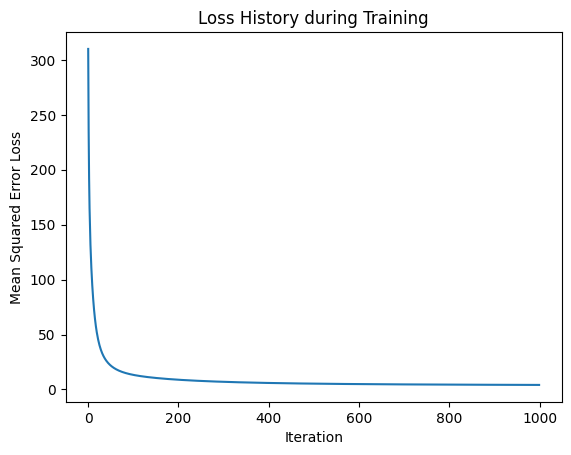

Mean Squared Error on Test Set: 7.4803
Coefficient of Determination R^2 on Test Set: 0.8534


In [7]:
# Train a quadratic polynomial regression model
model = PolynomialRegression(degree=2, learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Evaluate the model by calculating mean squared error of the test set
y_pred = model.predict(X_test)
errors = y_test - y_pred
ss_residual = np.sum(errors**2)
mse = ss_residual / len(y_test)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
# Calculate the coefficient of determination R^2
ss_total = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_residual / ss_total)
print(f"Coefficient of Determination R^2 on Test Set: {r2:.4f}")

In [8]:
# Train a cubic polynomial regression model
model = PolynomialRegression(degree=3, learning_rate=0.005, n_iterations=10000, silent=True)
model.fit(X_train, y_train)

# Evaluate the model by calculating mean squared error of the test set
y_pred = model.predict(X_test)
errors = y_test - y_pred
ss_residual = np.sum(errors**2)
mse = ss_residual / len(y_test)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
# Calculate the coefficient of determination R^2
ss_total = np.sum((y_test - np.mean(y_test))**2)
r2 = 1 - (ss_residual / ss_total)
print(f"Coefficient of Determination R^2 on Test Set: {r2:.4f}")

Mean Squared Error on Test Set: 7.3632
Coefficient of Determination R^2 on Test Set: 0.8557


**Report:**

All in all, we seem to get a better performance on the test data with a polynomial regression than with a basic linear regression.  Note that when calculating MSE and $R^2$ we are not keeping any of the transformed features, so we really are comparing apples to apples.

We did encounter a problem however when training the cubic regression: when using the same learning rate and number of iterations as before our gradient descent algorithm would diverge to infinity and fail.  We were able to remedy this by using a smaller learning rate and allowing more iterations.  Other solutions might be to let the learning rate decay as the iteration count increases.  We may even consider re-standardizing our polynomial-transformed data before fitting, though this idea makes us uncomfortable.

## Congratz, you made it! :)